In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
import matplotlib.pyplot as plt
import numpy as np
import cv2

Found 3867 files belonging to 5 classes.
Found 450 files belonging to 5 classes.
Class names: ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
Train batch images shape: (32, 224, 224, 3)
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,597 (9.24 MB)

 Trainable params: 164,613 (643.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 32s 220ms/step - accuracy: 0.7998 - loss: 0.5571 - val_accuracy: 0.7844 - val_loss: 0.5909
Epoch 2/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 25s 203ms/step - accuracy: 0.8973 - loss: 0.2929 - val_accuracy: 0.8178 - val_loss: 0.4934
Epoch 3/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 25s 208ms/step - accuracy: 0.9307 - loss: 0.2007 - val_accuracy: 0.8133 - val_loss: 0.5570
Epoch 4/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 25s 206ms/step - accuracy: 0.9485 - loss: 0.1554 - val_accuracy: 0.8111 - val_loss: 0.5637
Epoch 5/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 25s 205ms/step - accuracy: 0.9615 - loss: 0.1149 - val_accuracy: 0.8222 - val_loss: 0.5482
Epoch 6/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 25s 203ms/step - accuracy: 0.9780 - loss: 0.0783 - val_accuracy: 0.8133 - val_loss: 0.6363
Epoch 7/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 25s 206ms/step - accuracy: 0.9837 - loss: 0.0618 - val_accuracy: 0.8044 - val_loss: 0.6345
Epoch 8/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 25s 205ms/step - accuracy: 0.9858 - loss: 0

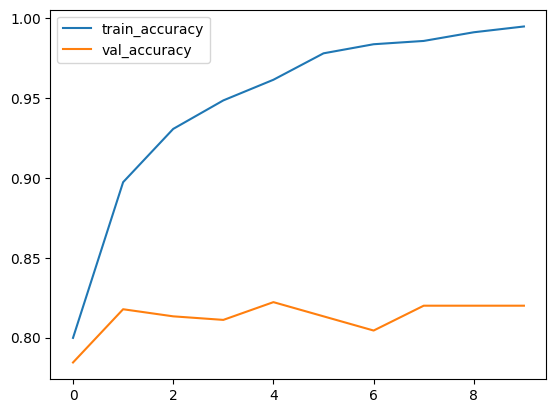

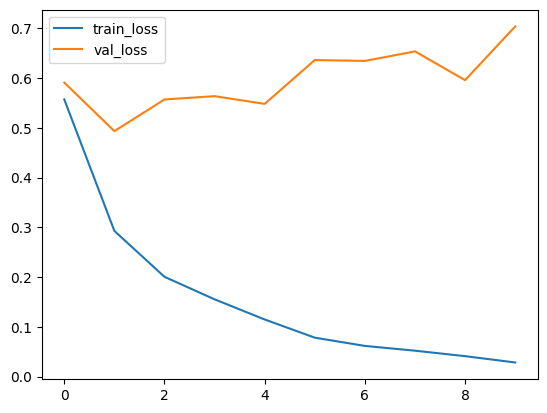

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted class: tulip


In [ ]:


train_dir = r'D:\RNW\10_Deep_learning\03_CNN_(Convolutional _Neural_Network)\Dataset\flowers_data\train'
val_dir = r'D:\RNW\10_Deep_learning\03_CNN_(Convolutional _Neural_Network)\Dataset\flowers_data\val'

# Load datasets explicitly as RGB images
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(224, 224),
    color_mode='rgb',   # Ensure 3 channels
    batch_size=32,
    label_mode='int'
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=(224, 224),
    color_mode='rgb',
    batch_size=32,
    label_mode='int'
)

class_names = train_ds.class_names
print("Class names:", class_names)

# Force RGB channels if any image has 1 channel
def force_rgb(image, label):
    if image.shape[-1] == 1:
        image = tf.image.grayscale_to_rgb(image)
    return image, label

train_ds = train_ds.map(force_rgb)
val_ds = val_ds.map(force_rgb)

# Normalize images
def normalize(image, label):
    image = tf.cast(image / 255., tf.float32)
    return image, label

train_ds = train_ds.map(normalize).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.map(normalize).prefetch(tf.data.AUTOTUNE)

# Confirm batch shape
for images, labels in train_ds.take(1):
    print(f'Train batch images shape: {images.shape}')  # (32, 224, 224, 3)

# Build model with MobileNetV2 base
base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model.trainable = False

inputs = layers.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(len(class_names), activation='softmax')(x)

model = models.Model(inputs, outputs)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train the model
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

# Save the trained model
model.save('flowers_mobilenetv2.keras')

# Plot training and validation accuracy/loss
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# Single image prediction
test_img_path = r"D:\RNW\10_Deep_learning\03_CNN_(Convolutional _Neural_Network)\Dataset\flowers_data\val\tulip\20701823522_43e3f4ba09_n.jpg"

test_image = cv2.imread(test_img_path)
if test_image is None:
    raise FileNotFoundError(f"Image not found at {test_img_path}")

test_image = cv2.resize(test_image, (224, 224))
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
test_input = test_image.astype(np.float32) / 255.0
test_input = np.expand_dims(test_input, axis=0)

loaded_model = tf.keras.models.load_model('flowers_mobilenetv2.keras')
predictions = loaded_model.predict(test_input)
predicted_idx = np.argmax(predictions, axis=1)[0]
predicted_class = class_names[predicted_idx]

print(f'Predicted class: {predicted_class}')


In [2]:

# Single image prediction
test_img_path = r"C:\Users\Krunal\Pictures\Screenshots\Screenshot 2025-08-23 092440.png"

test_image = cv2.imread(test_img_path)
if test_image is None:
    raise FileNotFoundError(f"Image not found at {test_img_path}")

test_image = cv2.resize(test_image, (224, 224))
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
test_input = test_image.astype(np.float32) / 255.0
test_input = np.expand_dims(test_input, axis=0)

loaded_model = tf.keras.models.load_model('flowers_mobilenetv2.keras')
predictions = loaded_model.predict(test_input)
predicted_idx = np.argmax(predictions, axis=1)[0]
predicted_class = class_names[predicted_idx]

print(f'Predicted class: {predicted_class}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step


NameError: name 'class_names' is not defined

In [ ]:
# "D:\RNW\10_Deep_learning\03_CNN_(Convolutional _Neural_Network)\Dataset\flowers_data\val\tulip\20701823522_43e3f4ba09_n.jpg"


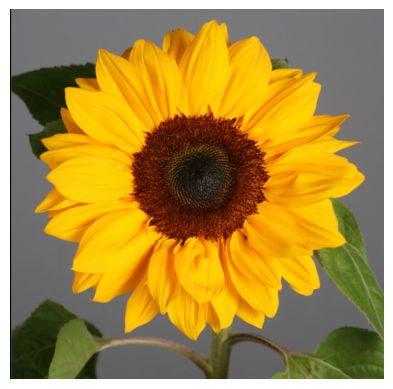

In [3]:
import cv2
import matplotlib.pyplot as plt

# Reading the image
# test_img_path = "C:\\Users\\Krunal\\Pictures\\Screenshots\\Screenshot 2025-08-23 085924.png"
test_img_path = r"C:\Users\Krunal\Pictures\Screenshots\Screenshot 2025-08-23 092440.png"
# test_img_path = r"C:\Users\Krunal\Pictures\Screenshots\Screenshot 2025-08-25 122615.png"
# test_img_path = r"D:\RNW\10_Deep_learning\03_CNN_(Convolutional _Neural_Network)\Dataset\flowers_data\val\tulip\20701823522_43e3f4ba09_n.jpg"

test_image = cv2.imread(test_img_path)
# Displaying the image
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Hide the axis
plt.show()